E3. 카메라 스티커앱 만들기 첫걸음
===
--- 

![sticker_app](https://user-images.githubusercontent.com/70703320/104260955-cf6a3000-54c7-11eb-9e0a-e30992682884.png)

이번 노드에서는 **사진에 여러 가지 스티커를 부착하기**를 해보았다. 이는 카메라 스티커앱을 만들때도 활용될 수 있다. 나중에 만들어볼 날을 기대하며 도전해본다!!


---

## 1. 사진에 고양이 수염스티커 붙이기

### 1.1 필요한 모듈 import

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

### 1.2 이미지를 읽어들이기
#### 1) 이미지 path 설정

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/h1.jpg'

#### 2) 이미지를 imread로 불러들이기

In [3]:
img_bgr = cv2.imread(my_image_path)

#### 3) 이미지를 640X360 크기로 resize!

In [4]:
img_bgr = cv2.resize(img_bgr, (640, 360))    

#### 4) 출력용 이미지를 별도로 보관

In [5]:
img_show = img_bgr.copy()     

#### 5)  BGR이미지를 RGB이미지로 전환!

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb_copy = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#### 6) 이미지를 출력

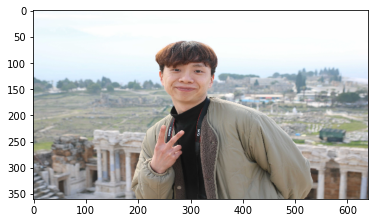

In [7]:
plt.imshow(img_rgb)
plt.show()

### 1.3 얼굴 인식하기

#### 1) dlib의 hog detector를 선언

In [8]:
detector_hog = dlib.get_frontal_face_detector() 

#### 2) detector를 이용하여 이미지의 얼굴 부분에서 bounding box처리할 좌표를 추출

In [9]:
dlib_rects = detector_hog(img_rgb, 1) 

### 먼저 cv2.rectangle의 기능을 먼저 확인해보자!

![스크린샷, 2021-01-12 11-53-44](https://user-images.githubusercontent.com/70703320/104263749-887f3900-54cd-11eb-86b4-1ed18e35d129.png)

[출처](https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/)

#### 3) 이미지에 인식 부분 box 좌표를 토대로 bounding box를 이미지 위에 표시

In [10]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (255,255,0), 1, lineType=cv2.LINE_4)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#### 4) bounding box의 꼭지점 좌표 출력 

In [11]:
print(dlib_rects)

rectangles[[(245, 86) (335, 176)]]


#### 5) bounding box가 표시된 이미지를 확인

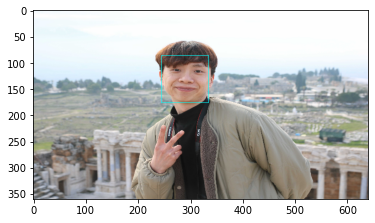

In [12]:
plt.imshow(img_show_rgb)
plt.show()

### 1.4 얼굴 랜드마크 표시하기

#### 1) 랜드마크의 경로 지정해주기

In [13]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

#### 2) 저장한 랜드마크를 불러오기

In [14]:
landmark_predictor = dlib.shape_predictor(model_path)

#### 3) 불러온 이미지(img_rgb)와 bounding box의 좌표(dlib_rect)를 통해 랜드마크 표시

In [15]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

#### 4) 출력하여 list_landmark에 저장된 랜드마크의 개수 확인

In [16]:
print(len(list_landmarks[0]))

68


#### 5) 68개의 랜드마크를 표시하기

In [17]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 1, (0, 255, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

#### 6) 이미지에 랜드마크 올려진 것 확인하기

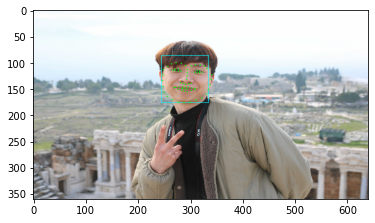

In [18]:
plt.imshow(img_show_rgb)
plt.show()

### 1.5 스티커 적용하기


### 여기서 어떻게 계산할 것인가를 고민!!

#### 먼저 스티커 확인!!
![cat-whiskers](https://user-images.githubusercontent.com/70703320/104287110-54217200-54f9-11eb-8826-82969fb9b626.png)
=> 스티커의 크기를 bounding box의 크기와 동일하게 해준 뒤 약간만 내려주면 됨!

#### 크기
- x좌표 : bounding box의 width
- y좌표 : bounding box의 height


#### 위치
![스크린샷, 2021-01-12 14-00-02](https://user-images.githubusercontent.com/70703320/104286817-eaa16380-54f8-11eb-9354-3037d4ec6031.png)

#### 위치
- x좌표 : 30의 좌표
- y좌표 : 30과 31의 평균 (코 중심과 코 아래의 가운데)

#### 1) 스티커 위치와 크기 정하기

In [19]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = (landmark[30][1]+landmark[33][1])//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(293, 131)
(x,y) : (293,136)
(w,h) : (91,91)


#### 2) 스티커 부를 경로 지정

In [20]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

#### 3) 스티커 이미지를 불러들여 저장

In [21]:
img_sticker = cv2.imread(sticker_path)

#### 4) 스티커 이미지의 크기를 재설정 후 확인

In [22]:
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(91, 91, 3)


#### 5) 스티커 이미지가 놓일 위치 조정

In [23]:
refined_x = x - w // 2  # left
refined_y = y - h // 2   
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (248,91)


#### 6) 스티커를 원본 이미지에 적용할 범위 설정

In [24]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

#### 7) 스티커 이미지에서 사용할 부분이 0인 색이 있는 부분을 사용

In [25]:
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

#### 8) 최종 이미지 출력

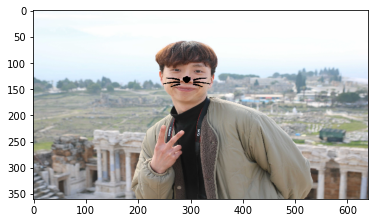

In [26]:
img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr)
plt.show()

---

## 2. 다른 사진에 적용 (가까이에서 찍은 사진 + 투명도 추가)


##### (코드 설명은 위와 동일하므로 간략히)

### 2.1 필요한 모듈 실행

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

### 2.2 이미지를 읽어들이기 (여기서 원본의 copy를 미리 빼둠)

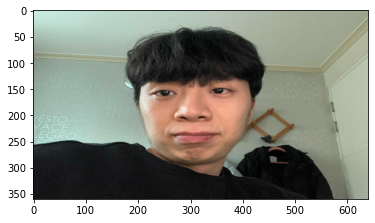

In [28]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/h3.jpg'
img_bgr = cv2.imread(my_image_path)   
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()      
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb_copy = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) ### 원본 copy 미리 빼둠
plt.imshow(img_rgb)
plt.show()

### 2.3 얼굴 인식하기

#### 1) bounding box처리할 좌표를 추출

In [29]:
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1) 


#### 2)  이미지에 인식 부분 box 좌표를 토대로 bounding box를 이미지 위에 표시 및 출력

rectangles[[(221, 98) (407, 284)]]


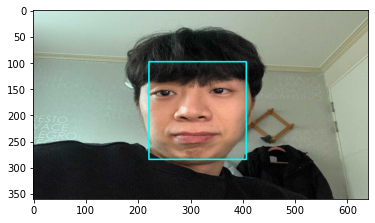

In [30]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (255,255,0), 2, lineType=cv2.FILLED)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2.4 얼굴에 랜드마크 표시하기

#### 1) 랜드마크 경로 지정 및 불러오기

In [31]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#### 2) 랜드마크 표시하고 개수 확인

In [32]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


#### 3) 랜드마크 출력하기

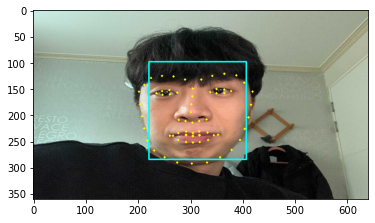

In [33]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2.5 스티커 출력하기

#### 1) 스티커 위치와 크기 세팅

In [34]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    x = landmark[33][0]
    y = (landmark[30][1]+landmark[33][1])//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (304,204)
(w,h) : (187,187)


#### 2) 스티커 크기 설정

In [35]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


#### 3) 스티커가 놓일 위치 지정

In [36]:
refined_x = x - w // 2  # left
refined_y = y - h // 2   
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (211,111)


#### 4) 스티커 부착

In [37]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#### 5) 스티커 합성본과 원본 copy를 합침 (비율 :: 합성본 : 원본copy = 7:3)

In [ ]:
img_bgr_transport = cv2.addWeighted(img_bgr, 0.7, img_rgb_copy, 0.3, 0)
plt.imshow(img_bgr_transport)
plt.show()

### 하면서 겪은 오류

먼저 사진을 선정하는 과정에도 어려움이 있었다. 사람의 얼굴을 인식하지 못하는 경우가 있었는데 대부분 얼굴의 방향이 달랐을 때였다. 또한, 사람의 얼굴이 많은 경우 인식을 많이하게 되면 한 얼굴밖에 스티커를 붙일 수 없었다. 코드를 고쳐 시도하려 했었지만 어려움이 존재하였다. 

1번 과정을 진행하면서 왕관 이모티콘을 붙이는 것과는 다르게 위치를 선정해주는 것에서 어려움이 있었다. 또한, 왕관으로 했을 경우의 코드에서는 스티커의 어레이가 다르게 되는 부분이 존재하였는데 사진의 맨 위쪽에서 범위를 설정해주어서 발생하는 오류였다. 따라서, 스티커가 위치할 곳을 시작점으로 범위를 주어 해결할 수 있었다.

2번 과정을 진행하면서는 투명하게 만드는 과정에서 시행착오를 겪었다. 반투명하게 해주는 방법은 addWeighted을 사용하여 원본사진과 스티커가 부착된 사진을 합침으로써 해결할 수 있었다. 